The mean is an interesting value.

In this notebook, we fetch an example sequence of numbers, with a distribution that is far from the standard bell-curve distribution.  We look at the properties of the mean as a predictor of the whole distribution.

First we load our usual libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 2 decimal places, show tiny values as 0
np.set_printoptions(precision=2, suppress=True)

We need Pandas to load the gender data that we first saw in the [data frame introduction](../04/data_frame_intro).

In [2]:
import pandas as pd

In [3]:
# Load the data file
gender_data = pd.read_csv('gender_stats.csv')

In this case, we are only interested in the data for the Maternal Mortality Ration `mat_mort_ratio`.

In [4]:
mat_mort_ratio = gender_data['mat_mort_ratio']

There are many `NaN` values in `mat_mort_ratio`.  For simplicity, we drop
these.

In [5]:
mat_mort_valid = mat_mort_ratio.dropna()

`mat_mort_valid` is a still a Pandas Series:

In [6]:
type(mat_mort_valid)

pandas.core.series.Series

Again, to make things a bit simpler, we convert this Series to an ordinary Numpy array:

In [7]:
mm_arr = np.array(mat_mort_valid)

The values for `mm_arr` are very far from a standard bell-curve or [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution).

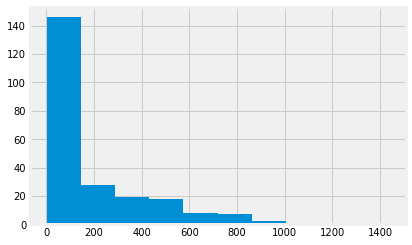

In [8]:
plt.hist(mm_arr);

We are interested in the *mean*.

In [9]:
mm_mean = np.mean(mm_arr)
mm_mean

181.4312227074236

As you remember, we get the mean by adding up all the values, and then dividing by the number of values, often written as $n$.

In [10]:
np.sum(mm_arr) / len(mm_arr)

181.4312227074236

Now let's consider the following situation.

I have all the values on my computer.

You don't have any of the values.

I want to give you one value, that will do the best possible job of *predicting* the values.  Call this the *predictor*.

Then I give you the values from the distribution one by one.  You see how good
your prediction is, by subtracting the *predictor* from the value I just gave
you.  That is your *prediction error* for that value.

One value I could give you as a predictor, is the mean.

Is that a good value to give you?

Let's start by shuffling up the values, ready to give you, one by one.

In [11]:
# Not really necessary, but still
mm_shuffled = mm_arr.copy()
np.random.shuffle(mm_shuffled)

I give you the mean, as a predictor.

Then I pass you the first value.  You subtract your predictor, to get the prediction error.

In [12]:
prediction_error_0 = mm_shuffled[0] - mm_mean
prediction_error_0

-118.18122270742359

We do the same for the second value:

In [13]:
prediction_error_1 = mm_shuffled[1] - mm_mean
prediction_error_1

694.3187772925764

To cut to the end, let's do all the values at once:

In [14]:
# Calculate all the prediction errors
prediction_errors = mm_shuffled - mm_mean
# Show the first 10
prediction_errors[:10]

array([-118.18,  694.32, -152.18,   63.82,  280.07, -178.43, -177.43,
        -61.43,  710.82, -176.43])

What do the prediction errors look like?

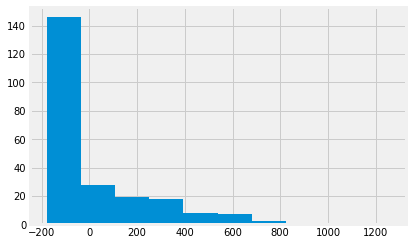

In [15]:
plt.hist(prediction_errors);

Notice the by-eye center of this distribution of prediction errors.

Let's add up all the prediction errors:

In [16]:
np.sum(prediction_errors)

2.0463630789890885e-12

The prediction errors add up to (very nearly) 0.  This is a property of the
mean.  The deviations from the mean sum to zero.

In fact, it is not very hard to show that the deviations [must sum to
zero](../extra/mean_deviations).

Here was our mean.

In [17]:
mm_mean

181.4312227074236

Another prediction we might be interested in, is one that gives us the smallest squared difference from the actual values.

Here are the squared differences from the mean.

In [18]:
# Squared prediction errors, for the mean
squared_pes = prediction_errors ** 2
# Show the first ten
squared_pes[:10]

array([ 13966.8 , 482078.56,  23159.12,   4072.84,  78438.52,  31837.7 ,
        31481.84,   3773.8 , 505263.33,  31127.98])

With a good prediction, we might want these squared prediction errors to be small.  We can see how small these are by adding them all up.  This gives us the "sum of squares".

In [19]:
sos = np.sum(squared_pes)
sos

12392168.854257641

That is the sum of squared prediction errors that the mean gives us.  Could some other value give us a better (lower) sum of squared prediction error.

Let's try lots of predictors, to see which gives us the smallest squared prediction error.

In [20]:
# Try lots of values between 150 and 210
predictors = np.arange(150, 210, 0.1)
# First 10
predictors[:10]

array([150. , 150.1, 150.2, 150.3, 150.4, 150.5, 150.6, 150.7, 150.8,
       150.9])

We make a function that accepts the values, and the predictor as arguments, and returns the sum of squares of the prediction errors:

In [21]:
def sum_of_squares(vals, predictor):
    pred_errs = vals - predictor
    sq_pred_errs = pred_errs ** 2
    return np.sum(sq_pred_errs)

We confirm that this gives us the value we saw before, when we use the mean as a predictor:

In [22]:
sum_of_squares(mm_arr, mm_mean)

12392168.854257643

Here's what we get if we use the first predictor value:

In [23]:
sum_of_squares(mm_arr, predictors[0])

12618402.9375

Now we try all the predictor values, to see which value gives us the lowest sum of squared errors.

In [24]:
# How many predictors do we have to try?
n_predictors = len(predictors)
n_predictors

600

In [25]:
# An array to store the sum of squares values for each predictor
sos_for_predictors = np.ones(n_predictors)

We calculate all the sums of squares:

In [26]:
for i in np.arange(n_predictors):
    predictor = predictors[i]
    sos = sum_of_squares(mm_arr, predictor)
    sos_for_predictors[i] = sos

Which predictor is giving us the lowest value for the sum of squares?

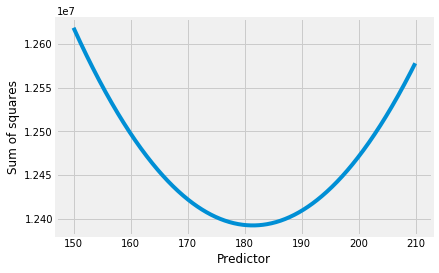

In [27]:
plt.plot(predictors, sos_for_predictors)
plt.xlabel('Predictor')
plt.ylabel('Sum of squares');

The smallest value we found for the sum of squares was:

In [28]:
np.min(sos_for_predictors)

12392169.077499999

In fact, the value for the mean is even lower:

In [29]:
sum_of_squares(mm_arr, mm_mean)

12392168.854257643

We would have to use some [simple
calculus](https://github.com/matthew-brett/biosciences-intro/blob/master/mean_minimizes_ss_deviations.ipynb)
to show this, but the mean has to give the lowest sum of squares error.

Put another way, the mean minimizes:

* the sum of the errors;
* the sum of squared errors.